## ** The most basic models for recommendations systems are  **collaborative filtering** models which are based on assumption that people like things similar to other things they like, and things that are liked by other people with similar taste.**

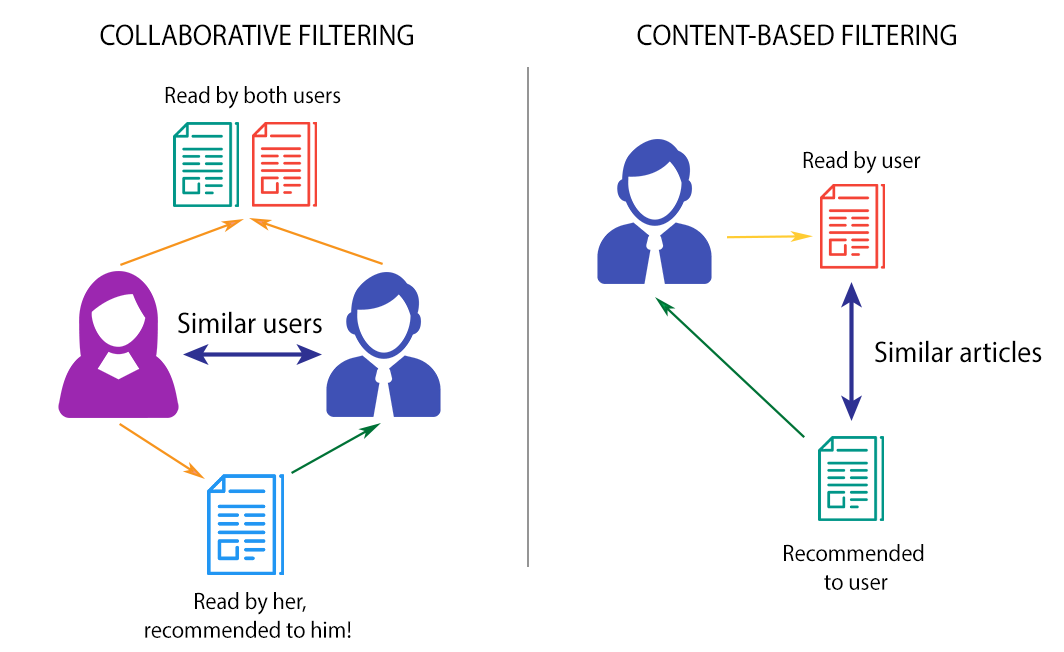

**load dataset**

In [ ]:
!git clone https://github.com/vishalbpatil1/Movie-Lens-Collaborative-Filtering.git

In [ ]:
import pandas as pd
from scipy import sparse

In [ ]:
ratings = pd.read_csv('/content/Movie-Lens-Collaborative-Filtering/dataset/ratings.csv')
movies = pd.read_csv('/content/Movie-Lens-Collaborative-Filtering/dataset/movies.csv')
ratings = pd.merge(movies,ratings).drop(['genres','timestamp'],axis=1)
print(ratings.shape)
ratings.head()

In [ ]:
ratings.info()

In [ ]:
userRatings = ratings.pivot_table(index=['userId'],columns=['title'],values='rating')
userRatings.head().T

In [ ]:
print("Before: ",userRatings.shape)

In [ ]:
userRatings = userRatings.dropna(thresh=10, axis=1).fillna(0,axis=1)

In [ ]:
print("After: ",userRatings.shape)

In [ ]:
userRatings.head()

In [ ]:
corrMatrix = userRatings.corr(method='pearson')

In [ ]:
corrMatrix.head().iloc[:,:5]

In [ ]:
def get_similar(movie_name,rating):
    similar_ratings = corrMatrix[movie_name]*(rating-2.5)
    similar_ratings = similar_ratings.sort_values(ascending=False)
    #print(type(similar_ratings))
    return similar_ratings

In [ ]:
romantic_lover = [("(500) Days of Summer (2009)",5),("Alice in Wonderland (2010)",3),("Aliens (1986)",1),("2001: A Space Odyssey (1968)",2)]
similar_movies = pd.DataFrame()
for movie,rating in romantic_lover:
    similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)

similar_movies.head(10)

In [ ]:
similar_movies.sum().sort_values(ascending=False).head(20)

In [ ]:
action_lover = [("Amazing Spider-Man, The (2012)",5),("Mission: Impossible III (2006)",4),("Toy Story 3 (2010)",2),("2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",4)]
similar_movies = pd.DataFrame()
for movie,rating in action_lover:
    similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)

similar_movies.head(10)
similar_movies.sum().sort_values(ascending=False).head(20)